In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess





to_folder_path = "../../output/total/"
to_df = pd.read_csv(os.path.join(to_folder_path, "locm_acceptance_rate.csv"))
to_df.columns = to_df.columns.str.strip()
to_df['len%'] = to_df['len%'].astype(float) * 100.0
to_df['domain'] = to_df['domain'].str.strip()

to2_df = pd.read_csv(os.path.join(to_folder_path, "locm2_acceptance_rate.csv"))
to2_df.columns = to2_df.columns.str.strip()
to2_df['len%'] = to2_df['len%'].astype(float) * 100.0
to2_df['domain'] = to2_df['domain'].str.strip()

to3_df = pd.read_csv(os.path.join(to_folder_path, "locm3_acceptance_rate.csv"))
to3_df.columns = to3_df.columns.str.strip()
to3_df['len%'] = to3_df['len%'].astype(float) * 100.0
to3_df['domain'] = to3_df['domain'].str.strip()

flexs = [0.1, 0.4, 0.7]

plt.rcParams.update({
    "font.size": 14,        # base font size
    "axes.titlesize": 16,   # subplot titles
    "axes.labelsize": 16,   # axis labels
    "xtick.labelsize": 14,  # x-tick labels
    "ytick.labelsize": 14,  # y-tick labels
    "legend.fontsize": 14   # legend text
})

plt.rcParams.update({"font.size": 14, "axes.titlesize": 18})

sns.set_context("paper", font_scale=1.5)
# 2) optional seaborn theme
sns.set_style("whitegrid")



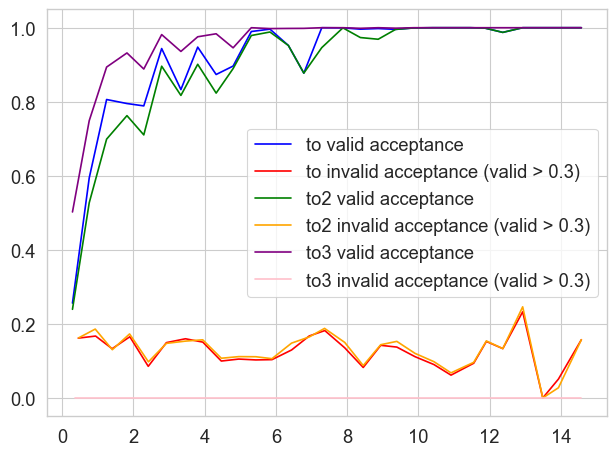

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Helper function for binning and smoothing ===
def smooth_by_bin_mean(df, x_col, y_col, bins=30):
    df_sorted = df.sort_values(by=x_col).copy()
    bin_edges = np.linspace(df_sorted[x_col].min(), df_sorted[x_col].max(), bins)
    df_sorted['bin'] = pd.cut(df_sorted[x_col], bins=bin_edges)
    grouped = df_sorted.groupby('bin', observed=True).agg({x_col: 'mean', y_col: 'mean'}).dropna()
    return grouped[x_col].values, grouped[y_col].values

# === Filter and smooth ===
to_valid_x, to_valid_y = smooth_by_bin_mean(to_df, 'len%', 'acceptance_rate')
to_invalid_x, to_invalid_y = smooth_by_bin_mean(to_df[to_df['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')

to2_valid_x, to2_valid_y = smooth_by_bin_mean(to2_df, 'len%', 'acceptance_rate')
to2_invalid_x, to2_invalid_y = smooth_by_bin_mean(to2_df[to2_df['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')

to3_valid_x, to3_valid_y = smooth_by_bin_mean(to3_df, 'len%', 'acceptance_rate')
to3_invalid_x, to3_invalid_y = smooth_by_bin_mean(to3_df[to3_df['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')

# === Plot ===
plt.plot(to_valid_x, to_valid_y, label='to valid acceptance', color='blue')
plt.plot(to_invalid_x, to_invalid_y, label='to invalid acceptance (valid > 0.3)', color='red')

plt.plot(to2_valid_x, to2_valid_y, label='to2 valid acceptance', color='green')
plt.plot(to2_invalid_x, to2_invalid_y, label='to2 invalid acceptance (valid > 0.3)', color='orange')

plt.plot(to3_valid_x, to3_valid_y, label='to3 valid acceptance', color='purple')
plt.plot(to3_invalid_x, to3_invalid_y, label='to3 invalid acceptance (valid > 0.3)', color='pink')

plt.legend()
plt.tight_layout()
plt.show()


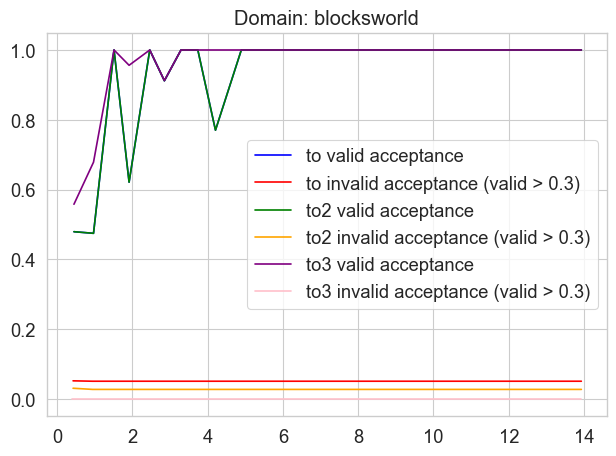

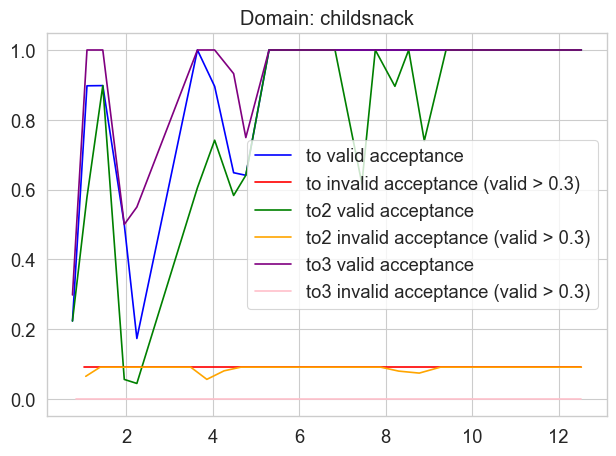

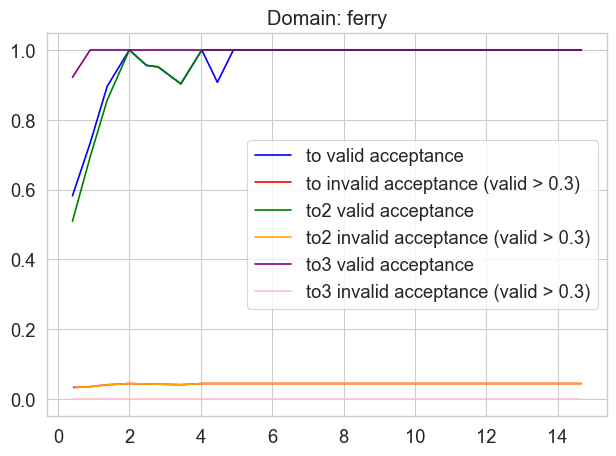

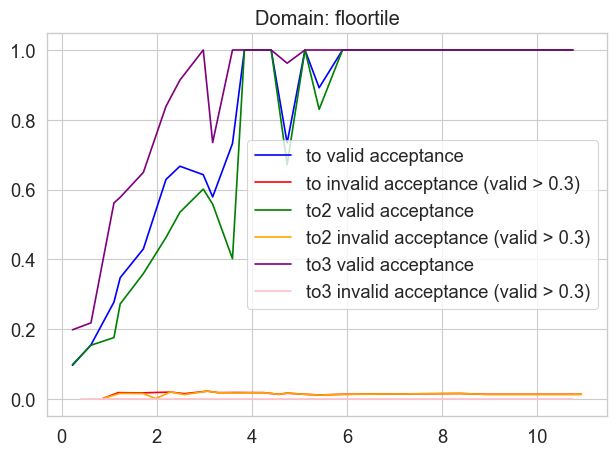

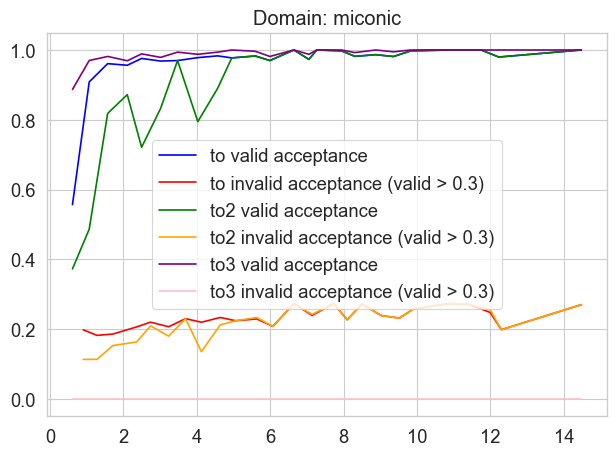

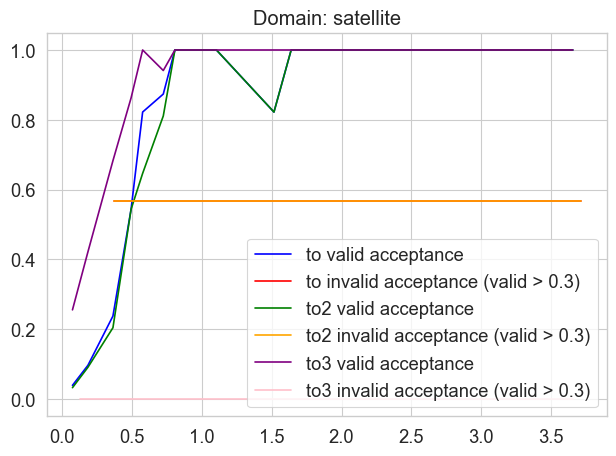

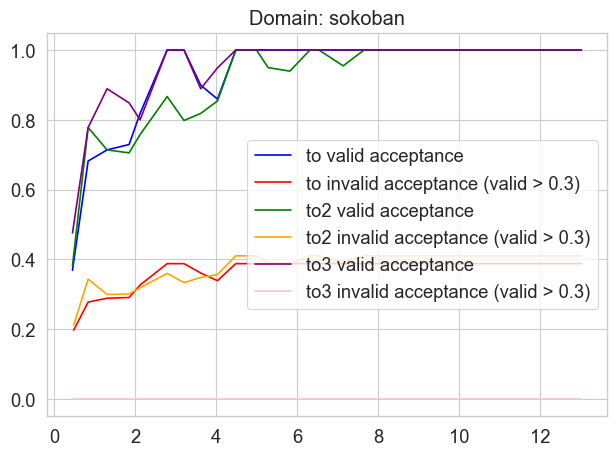

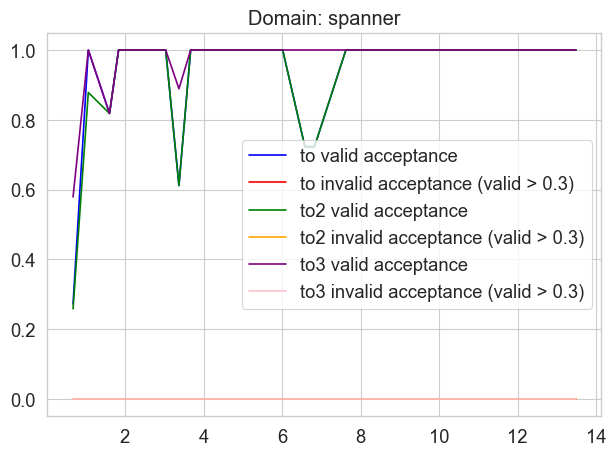

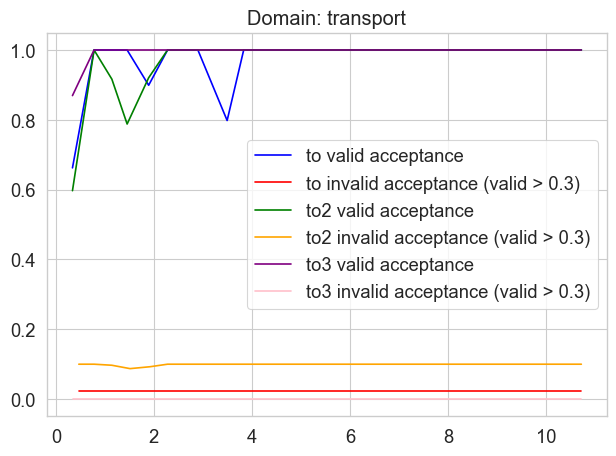

In [3]:
domains = to_df['domain'].unique()
for domain in domains:
    domain_df = to_df[to_df['domain'] == domain]
    domain_df2 = to2_df[to2_df['domain'] == domain]
    domain_df3 = to3_df[to3_df['domain'] == domain]

    to_valid_x, to_valid_y = smooth_by_bin_mean(domain_df, 'len%', 'acceptance_rate')
    to_invalid_x, to_invalid_y = smooth_by_bin_mean(domain_df[domain_df['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')
    to2_valid_x, to2_valid_y = smooth_by_bin_mean(domain_df2, 'len%', 'acceptance_rate')
    to2_invalid_x, to2_invalid_y = smooth_by_bin_mean(domain_df2[domain_df2['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')
    to3_valid_x, to3_valid_y = smooth_by_bin_mean(domain_df3, 'len%', 'acceptance_rate')
    to3_invalid_x, to3_invalid_y = smooth_by_bin_mean(domain_df3[domain_df3['acceptance_rate'] > 0.3], 'len%', 'invalid_acceptance_rate')

    plt.plot(to_valid_x, to_valid_y, label='to valid acceptance', color='blue')
    plt.plot(to_invalid_x, to_invalid_y, label='to invalid acceptance (valid > 0.3)', color='red')

    plt.plot(to2_valid_x, to2_valid_y, label='to2 valid acceptance', color='green')
    plt.plot(to2_invalid_x, to2_invalid_y, label='to2 invalid acceptance (valid > 0.3)', color='orange')

    plt.plot(to3_valid_x, to3_valid_y, label='to3 valid acceptance', color='purple')
    plt.plot(to3_invalid_x, to3_invalid_y, label='to3 invalid acceptance (valid > 0.3)', color='pink')

    plt.title(f"Domain: {domain}")
    plt.legend()
    plt.tight_layout()
    plt.show()
    